In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import ipywidgets as widgets
import modules.helpers as h
import glob
import os
from IPython.display import Image as IPyImage
from matplotlib.patches import Circle

%matplotlib ipympl
plt.ioff()

In [2]:
data_folder = 'data'
h.list_files(data_folder)

data/
    oct8/
        first/
            10_6.JPG
            29_4.JPG
            14_6.JPG
            C_10_6.JPG
            50_8.JPG
            45_5.JPG
            20_2.JPG
            1_1.JPG
            4_5.JPG
            40_0.JPG
            34_9.JPG
            25_1.JPG
            .ipynb_checkpoints/
        second/
            30_4.JPG
            9_6.JPG
            49_9.JPG
            20_3.JPG
            2_1.JPG
            40_4.JPG
        .ipynb_checkpoints/
    calibration/
        calibration.csv
        HR66.HEIC
        hr66_calibration.csv
        HR66_curve.HEIC
    .ipynb_checkpoints/


In [14]:
sub_dir = './data/oct8/first'
Ofiles = glob.glob(f"{sub_dir+os.sep}[!C_]*.JPG") ## Use regex to avoid C_ files


# f = lambda x: IPyImage(filename = x,width = 400, height = 200)
# wi = widgets.interact(f, x = files)

### Apply red filter --> convert to eight bit --> save

##### Default cv2 reads BGR
https://stackoverflow.com/questions/50963283/python-opencv-imshow-doesnt-need-convert-from-bgr-to-rgb

##### Grayscale image has shape (height, width, intensity) with shape (height,width).

In [223]:
h_slider = widgets.IntSlider(value = 1176,
                             min=0, max=len(gray), step=5,continuous_update =False)
w_slider = widgets.IntSlider(value = 2480,
                             min=0, max = len(gray[0]),step = 5,continuous_update =False)
r_slider = widgets.IntSlider(value = 400,
                               min=0, max = 600, step = 20,continuous_update =False)

def plot_func(x,y,r,image):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap = 'Reds_r', alpha =0.5)
    circ = Circle((x,y),r,alpha = 0.5)
    ax.add_artist(circ)
    fig.show()
f = lambda x,y,r: plot_func(x,y,r, cv2.cvtColor(cv2.imread(Ofiles[0]),cv2.COLOR_BGR2GRAY))
widgets.interact(f, x = h_slider,y = w_slider, r = r_slider)

interactive(children=(IntSlider(value=1176, continuous_update=False, description='x', max=3000, step=5), IntSl…

<function __main__.<lambda>(x, y, r)>

In [208]:
h_slider.value, w_slider.value, r_slider.value

(1176, 2480, 200)

In [358]:
import cv2

x_cen = []
y_cen = []
r_cen = []
plt.close()
for f in Ofiles[1:2]:
    im = cv2.imread(f)
    ### Red filter
    im[:,:,0] = np.zeros([im.shape[0], im.shape[1]])
    im[:,:,1] = np.zeros([im.shape[0], im.shape[1]])
    
    ## Convert to gray-scale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  ## Converted to gray scale image
    cv2.imwrite(os.path.dirname(file)+os.sep+f"C_{os.path.basename(f)}", gray) # Export the gray-scale image
    
    height,width = gray.shape
    mask = np.zeros((height,width), np.uint8)
    circ_mask = cv2.circle(mask,(h_slider.value, w_slider.value),r_slider.value,255,thickness=-1)
    imageStarsCropped = cv2.bitwise_and(gray, circ_mask)
    y=2213; dy= 500;  x = 850;dx = 800;
    # _,thresh = cv2.threshold(imageStarsCropped,30,255,cv2.THRESH_BINARY) ## threshold set to 20
    
    cropped = cv2.bitwise_not(imageStarsCropped[y:y+dy, x:x+dx])
    # contours,_ = cv2.findContours(cropped,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)


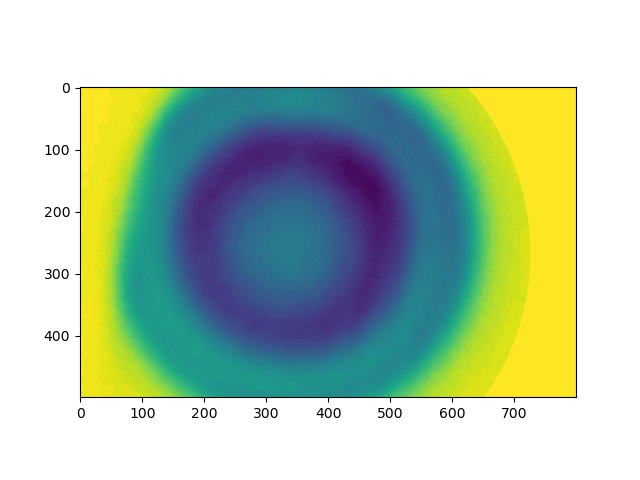

In [360]:
crop_sqr = cropped**2
plt.imshow(cropped)
plt.show()

##### Plan: Add mouse interaction (alternatively use slider). Add fitting to center for ring extraction